In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.alad import ALAD

normal_path = "fouriers/S01/1/Normal/q_data"
relay_path  = "fouriers/S01/1/Relay/q_data"

with h5py.File("datasets/fouriers_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    dataset_normal = np.zeros((10916, 72))
    dataset_relay  = np.zeros((9239, 72))

    for i in range(10916):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(9239):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:9916]
X_test_normal         = dataset_normal[9916:]
X_test_relay          = dataset_relay[8239:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))


Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      1000
       Relay       0.31      0.00      0.01      1000

    accuracy                           0.50      2000
   macro avg       0.40      0.50      0.34      2000
weighted avg       0.40      0.50      0.34      2000



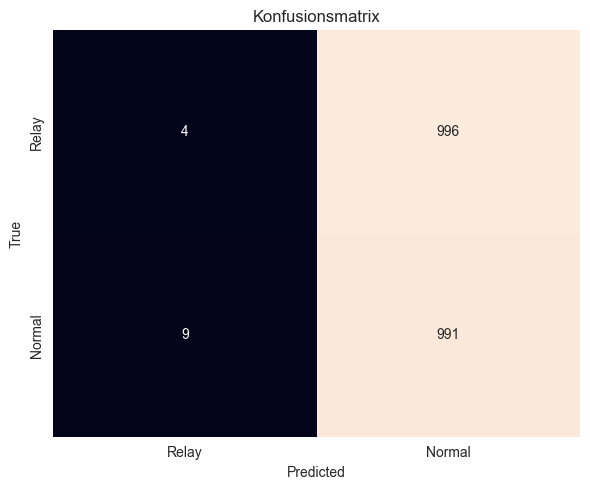

In [2]:
clf = ALAD(contamination=0.01)
clf.fit(X_train)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      1000
       Relay       0.59      0.01      0.02      1000

    accuracy                           0.50      2000
   macro avg       0.54      0.50      0.34      2000
weighted avg       0.54      0.50      0.34      2000



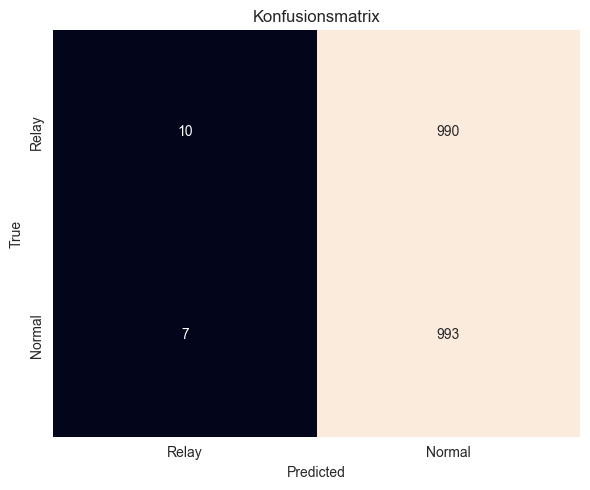

In [3]:
clf = ALAD(contamination=0.01)
clf.fit(X_train_scaled_standard)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined_scaled_standard)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.66      1000
       Relay       0.48      0.01      0.02      1000

    accuracy                           0.50      2000
   macro avg       0.49      0.50      0.34      2000
weighted avg       0.49      0.50      0.34      2000



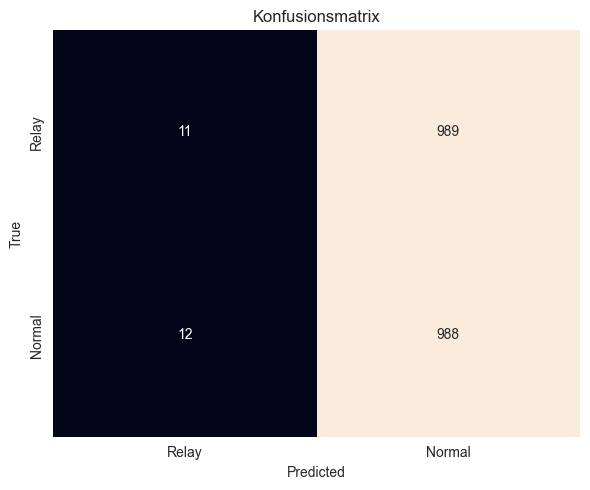

In [4]:
clf = ALAD(contamination=0.01)
clf.fit(X_train_scaled_minmax)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined_scaled_minmax)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()